In [18]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Band, ColumnDataSource, PrintfTickFormatter, DatetimeTickFormatter, Label
from bokeh.layouts import column
from bokeh.models.tickers import MonthsTicker

In [56]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import Ridge

In [1]:
import pandas as pd

In [2]:
dataset_raw = pd.read_csv('/Users/smritisharma/Downloads/ML Algo/Regression/Customer Purchasing Behaviors.csv')
data_sort = dataset_raw.sort_values(by=['age'],ascending=True)

In [28]:
data_young = data_sort[dataset_raw['age']<30]
data_mid = data_sort[(dataset_raw['age']>30) & (dataset_raw['age']<40)]
data_old = data_sort[dataset_raw['age']>50]

/var/folders/07/k5yl7gh910z94ykjp27bzs1w0000gn/T/ipykernel_3278/809051086.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_young = data_sort[dataset_raw['age']<30]
/var/folders/07/k5yl7gh910z94ykjp27bzs1w0000gn/T/ipykernel_3278/809051086.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_mid = data_sort[(dataset_raw['age']>30) & (dataset_raw['age']<40)]
/var/folders/07/k5yl7gh910z94ykjp27bzs1w0000gn/T/ipykernel_3278/809051086.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_old = data_sort[dataset_raw['age']>50]


In [33]:
p = figure(height=400)
p.line(source=data_sort, x='age', y='purchase_frequency')
#general treand of the data is that the purchase amount and frequency of store visit is increasing
#as the age of the buyer increases
show(p)

In [49]:
data_sort = data_sort.drop(columns=['region'],axis=1)

In [50]:
X = np.hstack([data_sort.values[::2, :],
        data_sort.values[1::2, :2]])
y = data_sort.values[1::2, 2]

In [52]:
X_train, X_test,\
  y_train, y_test = train_test_split(X, y,
                    test_size=0.4,
                    random_state=1)

In [53]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
rig_reg = Ridge(alpha=1.0)
rig_reg.fit(X_train, y_train)

Ridge()

In [59]:
rig_reg.predict(X_train)


array([53106.99486522, 59033.35256287, 59991.57308495, 68000.97240324,
       46925.03708762, 52140.87434823, 62907.85289436, 70939.58383114,
       32030.1976094 , 64951.47448036, 43199.05166152, 69985.88549413,
       53130.21322469, 58060.53397915, 54925.80655164, 71998.3567247 ,
       58105.51741269, 49130.38971714, 53107.78932517, 46169.20075124,
       62297.82281774, 64951.00715098, 54055.68413152, 46201.29839453,
       61063.10938016, 32011.07922224, 70984.80092938, 51101.22719811,
       75411.13137418, 54026.12033656, 68358.65935812, 44993.75667053,
       57110.87014221, 31415.96706389, 72018.41319385, 59052.09708653,
       47039.79468586, 57078.91612096, 59998.51009915, 32040.55297454,
       74005.55287377, 43167.36131918, 65919.88439154, 67987.38561891,
       65950.71682228, 61013.73778785, 69989.95488168, 43173.45371727,
       50512.63416681, 49117.97125626, 44116.8789591 , 64968.73342226,
       46170.60785856, 69958.51264059, 46151.61466311, 55409.19211308,
      

In [60]:
print('Variance score: {}'.format(rig_reg.score(X_test, y_test)))

Coefficients:  [-2.10868759e-01 -1.37224939e+03  1.00848501e+00  7.01077068e-01
 -2.08472199e+02  6.87929135e+01 -2.18657582e-01  1.35553593e+03]
Variance score: 0.9924386692903066


In [ ]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

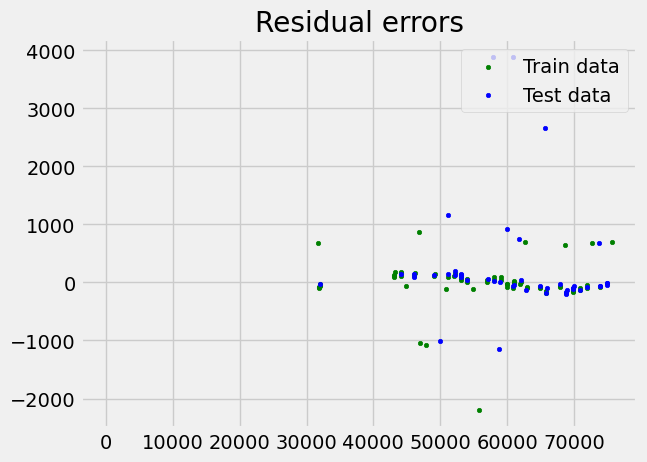

In [55]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()